# Flight delays
## by (Islam Fadly)

## Investigation Overview

> This set of slides will display some of the patterns and findings observed in US domestic flights in 2007.

## Dataset Overview

> The dataset lists 7,453,215 flights that that were operated in US in the year 2007. The dataset features 29 attributes for each flight..

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df07=pd.read_csv('2007.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Airlines delays breakdown

* It seems that HA and AQ (Hawaiian Airlines and Aloha Airlines) are doing better than other airlines in terms of managing delays.
* Aloha Airlines is doing better than others when it comes to making up delays with early arrivals.
* Hawaiian Airlines has an evident record of early departures, making them the only airline in the dataset with a negative average of departure delays.
* Atlantic Southeast Airlines are doing the worst in almost every aspect of delays.

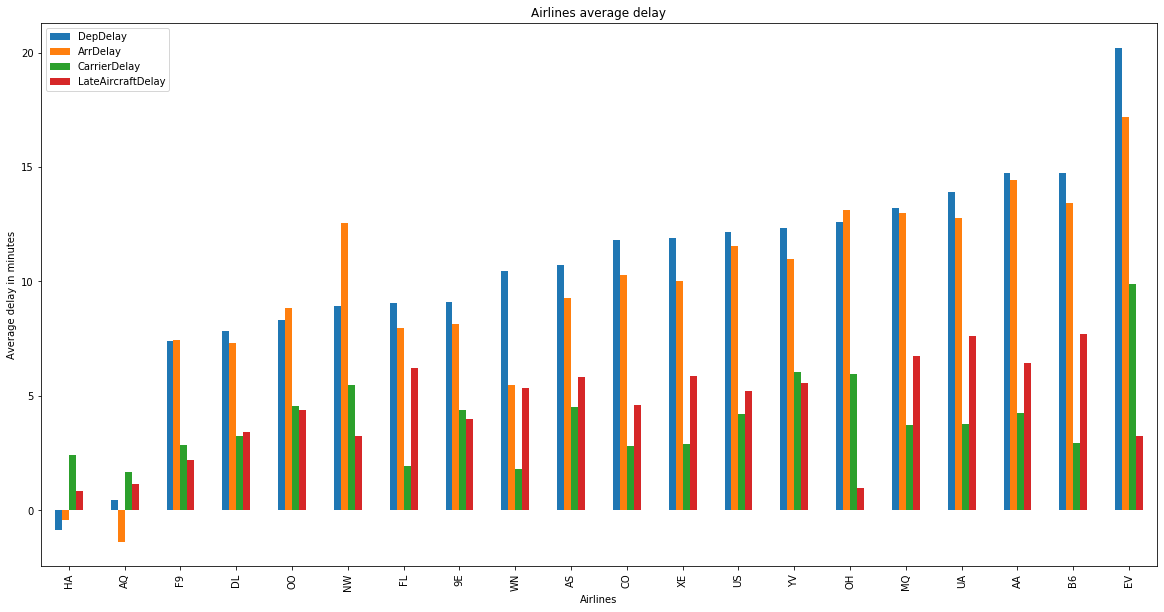

In [4]:
carrier_delays=df07.groupby('UniqueCarrier')['DepDelay','ArrDelay','CarrierDelay','LateAircraftDelay'].mean().round(decimals=2).sort_values(by='DepDelay')

carrier_delays.plot(kind='bar', figsize=(20, 10))
 
plt.xlabel('Airlines')
plt.ylabel('Average delay in minutes')
plt.title('Airlines average delay')
plt.show()

## Breakdown of flight cancellations in 2007

> Cancelled flights fall under one of the following categories;

* A: carrier - 41.5%
* B: weather - 38.5%
* C: NAS (National Aviation System) - 19.9%
* D: security - 0.02% (almost none)

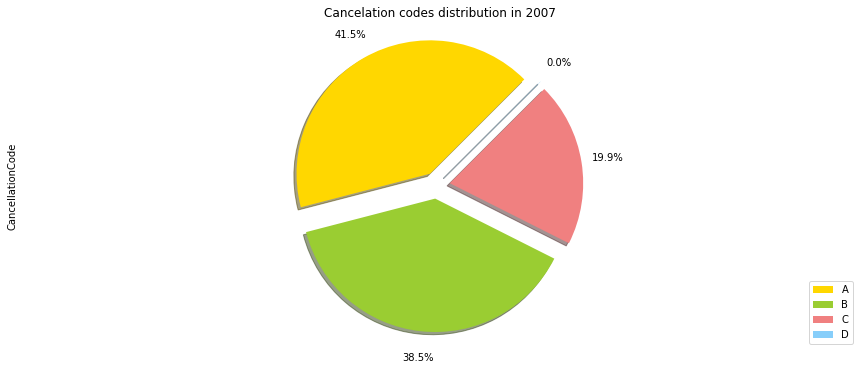

In [5]:
C_code=df07.CancellationCode.value_counts(normalize=True)
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode_list = [0.1, 0.1, 0.1, 0.1]
C_code.plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=45,shadow=True, labels=None, pctdistance=1.2, explode=explode_list, colors=colors_list);

plt.title('Cancelation codes distribution in 2007') 
plt.axis('equal') 
plt.legend(labels=C_code.index, loc='lower right') 
plt.show()

## Correlation matrix for delays

We can see here that departure and arrival delays have the strongest correlation, which makes sense. We can also see a considerable correlation between Late Aircraft delay, NAS delay, Carrier delay one one side and departure/arrival delays on the other side.

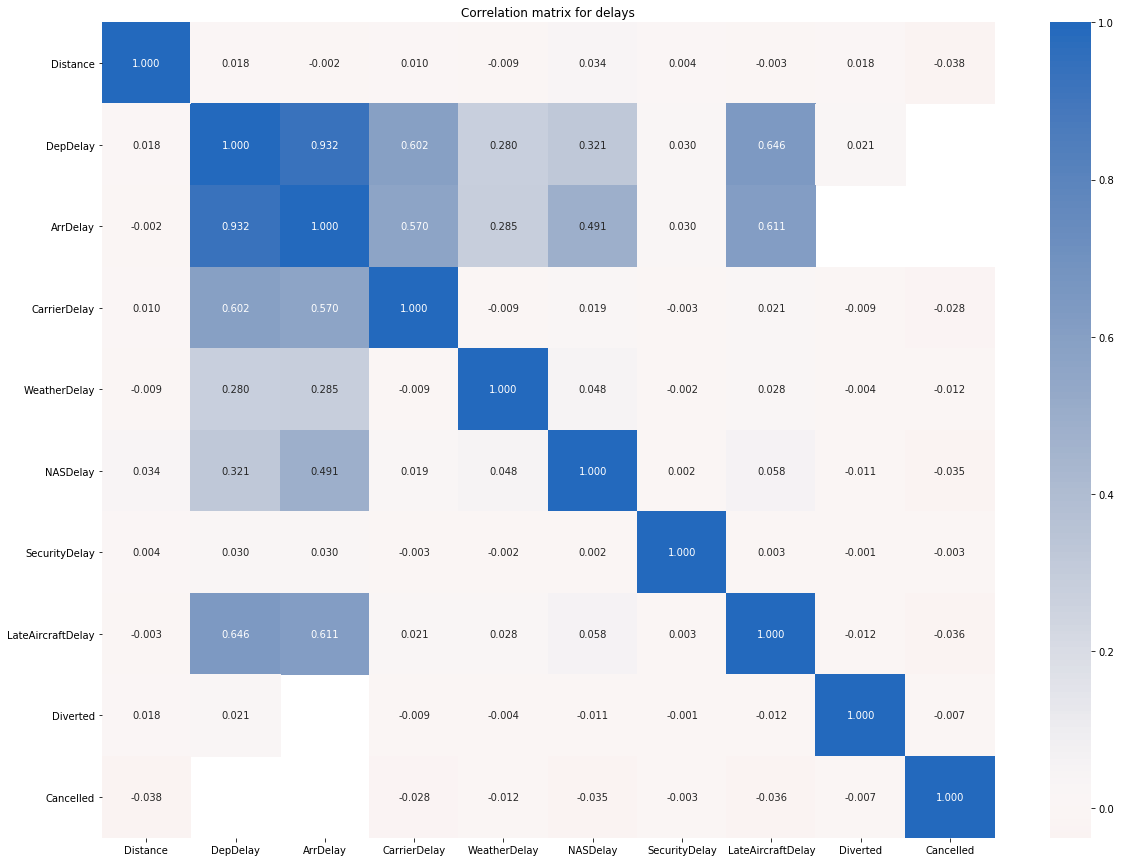

In [7]:
delays=df07[['UniqueCarrier','Origin','Dest','Distance','DepDelay','ArrDelay','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','Diverted','Cancelled', 'CancellationCode']]
plt.subplots(figsize=(20,15))
plt.title('Correlation matrix for delays')
sns.heatmap(delays.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);

## Depatrure delay vs. arrival delay

* Few flights have exceptionally large delay in arrival (such as 2500 minutes ~ 40 hours), this can only be justified if the delay in departure is also exceptionally large. Whcih is evident in the above plot.
* The strong relation between delays in flight departure and delays is as evident as it is logical, however, it can be observed that the extent of delay in arrival against zero-delay in departure is much higher than the extent of delay in departure against zero-delay in arrival. In other words, there is a considerable number of flights that had a delayed arrival despite departing on time.

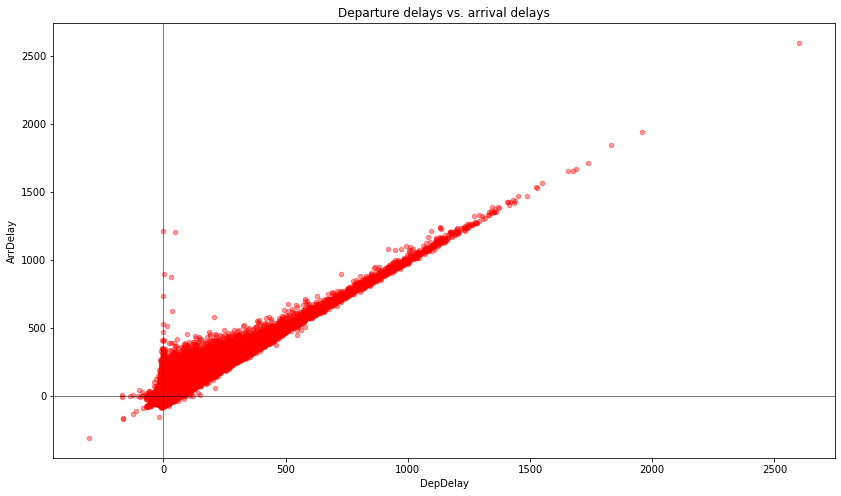

In [8]:
delays.plot(kind='scatter',x='DepDelay',y='ArrDelay',figsize=(14, 8),alpha=0.4,color='red')

plt.title('Departure delays vs. arrival delays')
plt.axhline(y=0,linewidth=0.5, color='k')
plt.axvline(x=0, linewidth=0.5,color='k')
plt.show()

## Depatrure delay vs. arrival delay scatter - Why some flights arrive late despite taking off on time? 

The darker spike on the y-axis suggests that a considerable number of flights gets delayed at arrival despite departing on time. Let's see which flights fall under these conditions.


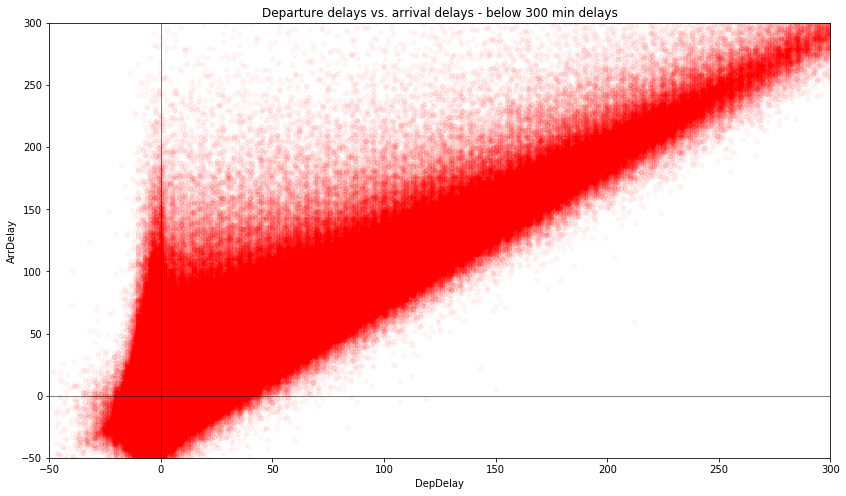

In [9]:
delays.plot(kind='scatter',x='DepDelay',y='ArrDelay',figsize=(14, 8),alpha=0.03, color='red',xlim=(-50,300), ylim=(-50,300))

plt.title('Departure delays vs. arrival delays - below 300 min delays')
plt.axhline(y=0,linewidth=0.5, color='k')
plt.axvline(x=0, linewidth=0.5,color='k')
plt.show()

## Depatrure delay vs. arrival delay heat map - Why some flights arrive late despite taking off on time? 

It is evident from the above heat map that the main attribute behind arrival delays for flights that actually departed on time is "NAS Delay" with a correlation factor of 0.93.

### What is NAS delay?

National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

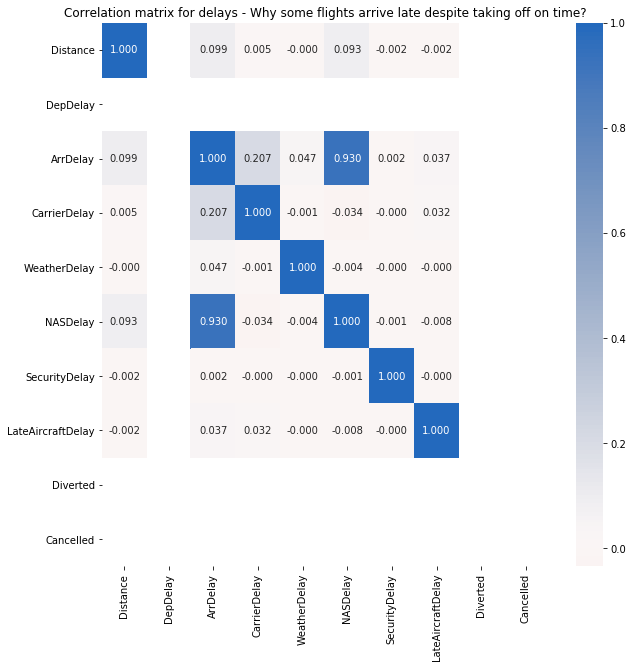

In [10]:
D_arr=delays[(delays.DepDelay==0) & (delays.ArrDelay>0)]
plt.subplots(figsize=(10,10))
plt.title('Correlation matrix for delays - Why some flights arrive late despite taking off on time?')
sns.heatmap(D_arr.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);

## Summary of main findings

* Best on-time performance goes to Hawaiian Airlines and Aloha Airlines.
* Hawaiian Airlines has an evident record of early departures, making them the only airline in the dataset with a negative average of departure delays.
* Chances for a flight to be cancelled for security reasons are very slim (0.02%)
* In general, early arrivals are more common than early departures.
* NAS delays are the main reason behind arrival delays for flights that departed on time.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!